In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
plt.rcParams["axes.labelsize"] = 14
import scipy
import scipy.io as sio
import matplotlib.pyplot as plt
import sklearn.decomposition
from pyriemann.utils.mean import mean_covariance
import pickle
from sklearn.metrics import confusion_matrix
sns.set_style("whitegrid")
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

## Tasks

### Figure 3.1 with correlation distance and k=1, k=10

/Users/michael/anaconda3/envs/fmri/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<Figure size 432x288 with 0 Axes>

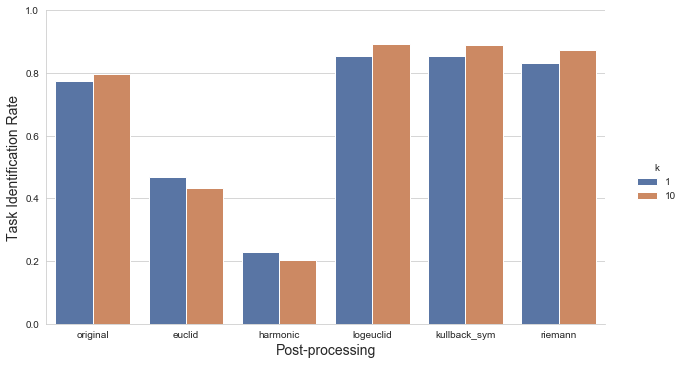

In [8]:
distances = pd.read_csv('tasks/distances_tangent_new.csv', names=["Type", "Task Identification Rate"])
new = distances["Type"].str.rsplit("_", n = 1, expand = True) 
distances['Post-processing'] = new[0]
distances['k'] = new[1]
distances['Post-processing'][distances['Post-processing']=='none'] = 'original'
distances.drop(columns =["Type"], inplace = True) 
distances.head()


sns.set_style("whitegrid")
plt.tight_layout()
ref_plot = sns.catplot(x="Post-processing", y="Task Identification Rate", hue="k", data=distances,
                height=6, kind="bar", palette="deep", legend_out=True).set(ylim=(0, 1))
ref_plot.fig.set_size_inches(10,5)
plt.savefig('tasks/distance_task_new.eps', bbox_inches='tight', transparent=True)
plt.show()

/Users/michael/anaconda3/envs/fmri/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


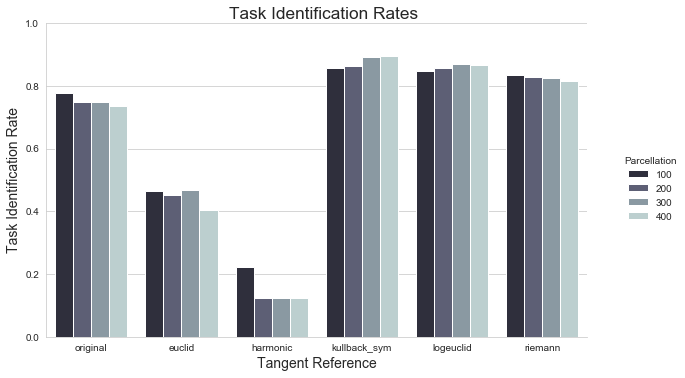

In [7]:
df = pd.read_csv('tasks/tasks_updated.csv', names=["First", "Task Identification Rate"])
df['Parcellation'], df['Tangent Reference'] = df['First'].str.split(':', 1).str
df.drop(['First'], axis=1, inplace=True)
df.round(3)
ref_plot = sns.catplot(x="Tangent Reference", y="Task Identification Rate", hue="Parcellation", data=df,
                height=6, kind="bar", palette="bone").set(ylim=(0, 1))
ref_plot.fig.suptitle('Task Identification Rates', y=1.02, fontsize='xx-large')
ref_plot.fig.set_size_inches(10,5)
plt.savefig('tasks/tasks.eps', bbox_inches='tight', transparent=True)
plt.show()

## Twins

### MZ Original

/Users/michael/anaconda3/envs/fmri/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


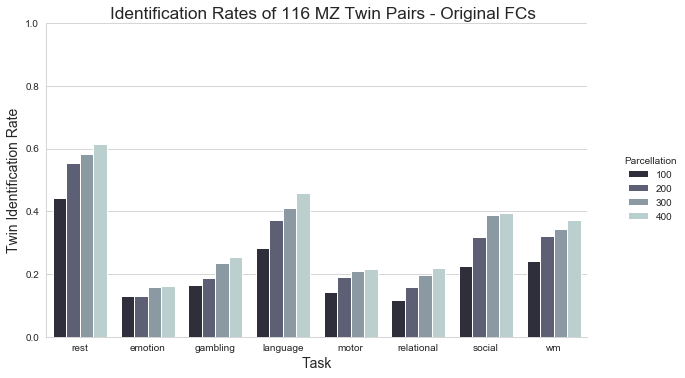

In [13]:
df = pd.read_csv('twins/MZ_twin_updated.csv', names=["First", "Twin Identification Rate"])
df['Parcellation'], df['Task'], df['Tangent Reference'] = df['First'].str.split(':', 2).str
df.drop(['First'], axis=1, inplace=True)
df.round(3)
ref_plot = sns.catplot(x="Task", y="Twin Identification Rate", hue="Parcellation", data=df[df['Tangent Reference']=='original'],
                height=6, kind="bar", palette="bone").set(ylim=(0, 1))
ref_plot.fig.suptitle('Identification Rates of 116 MZ Twin Pairs - Original FCs', y=1.02, fontsize='xx-large')
ref_plot.fig.set_size_inches(10,5)
plt.savefig('twins/MZ_orig.eps', bbox_inches='tight', transparent=True)
plt.show()

### MZ LogEuclid

/Users/michael/anaconda3/envs/fmri/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


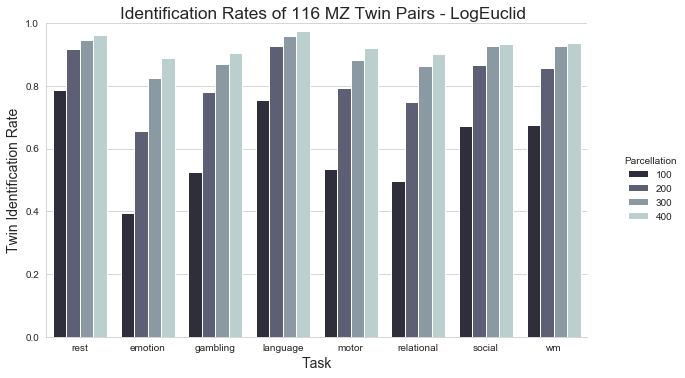

In [5]:
df = pd.read_csv('twins/MZ_twin_updated.csv', names=["First", "Twin Identification Rate"])
df['Parcellation'], df['Task'], df['Tangent Reference'] = df['First'].str.split(':', 2).str
df.drop(['First'], axis=1, inplace=True)
df.round(3)
ref_plot = sns.catplot(x="Task", y="Twin Identification Rate", hue="Parcellation", data=df[df['Tangent Reference']=='logeuclid'],
                height=6, kind="bar", palette="bone").set(ylim=(0, 1))
ref_plot.fig.suptitle('Identification Rates of 116 MZ Twin Pairs - LogEuclid', y=1.02, fontsize='xx-large')
ref_plot.fig.set_size_inches(10,5)
plt.savefig('twins/MZ_logeuclid.eps', bbox_inches='tight', transparent=True)
plt.show()

In [11]:
df = pd.read_csv('twins/MZ_twin_updated.csv', names=["First", "Twin Identification Rate"])
df['Parcellation'], df['Task'], df['Tangent Reference'] = df['First'].str.split(':', 2).str
df.drop(['First'], axis=1, inplace=True)
df.round(3)
df = df[['Task', 'Parcellation', 'Tangent Reference', 'Twin Identification Rate']]


/Users/michael/anaconda3/envs/fmri/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


0       True
1       True
2       True
3       True
4       True
       ...  
187    False
188    False
189    False
190    False
191    False
Name: Parcellation, Length: 192, dtype: bool

### MZ Tangent Comparison

/Users/michael/anaconda3/envs/fmri/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


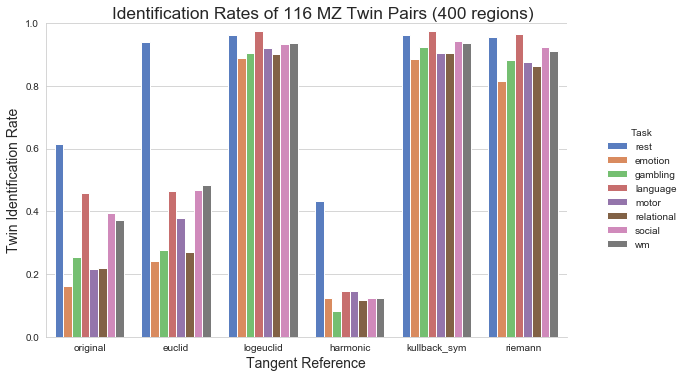

In [13]:
df = pd.read_csv('twins/MZ_twin_updated.csv', names=["First", "Twin Identification Rate"])
df['Parcellation'], df['Task'], df['Tangent Reference'] = df['First'].str.split(':', 2).str
df.drop(['First'], axis=1, inplace=True)
df.round(3)
df = df[['Task', 'Parcellation', 'Tangent Reference', 'Twin Identification Rate']]
ref_plot = sns.catplot(x="Tangent Reference", y="Twin Identification Rate", hue="Task", data=df[df['Parcellation']=='400'],
                height=6, kind="bar", palette="muted", ci=None).set(ylim=(0, 1))
ref_plot.fig.suptitle('Identification Rates of 116 MZ Twin Pairs (400 regions)', y=1.02, fontsize='xx-large')
ref_plot.fig.set_size_inches(10,5)
plt.savefig('twins/MZ_twin_pairs_tangent_updated.eps', bbox_inches='tight', transparent=True)
plt.show()

### DZ Twins

/Users/michael/anaconda3/envs/fmri/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


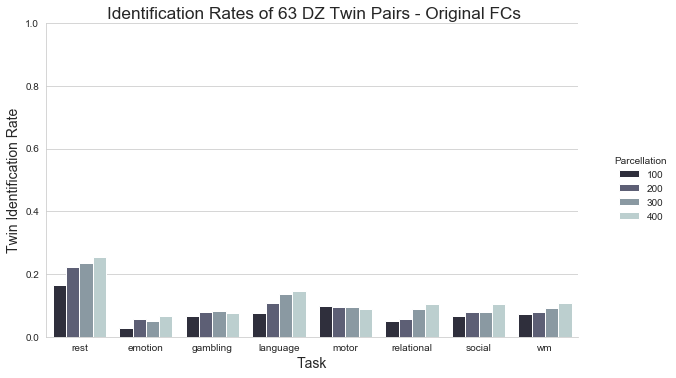

In [10]:
df = pd.read_csv('twins/DZ_twin_updated.csv', names=["First", "Twin Identification Rate"])
df['Parcellation'], df['Task'], df['Tangent Reference'] = df['First'].str.split(':', 2).str
df.drop(['First'], axis=1, inplace=True)
df.round(3)
ref_plot = sns.catplot(x="Task", y="Twin Identification Rate", hue="Parcellation", data=df[df['Tangent Reference']=='original'],
                height=6, kind="bar", palette="bone").set(ylim=(0, 1))
ref_plot.fig.suptitle('Identification Rates of 63 DZ Twin Pairs - Original FCs', y=1.02, fontsize='xx-large')
ref_plot.fig.set_size_inches(10,5)
plt.savefig('twins/DZ_orig.eps', bbox_inches='tight', transparent=True)
plt.show()

/Users/michael/anaconda3/envs/fmri/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


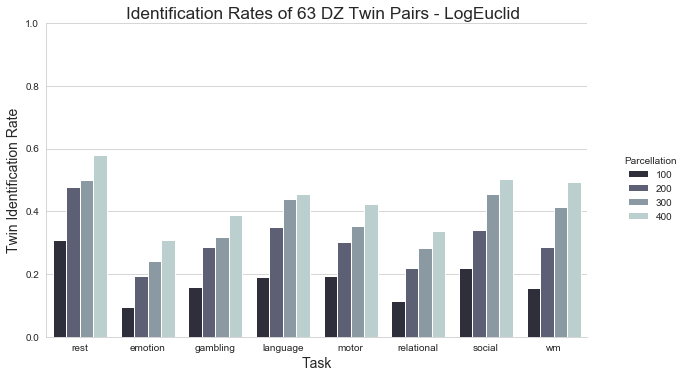

In [11]:
df = pd.read_csv('twins/DZ_twin_updated.csv', names=["First", "Twin Identification Rate"])
df['Parcellation'], df['Task'], df['Tangent Reference'] = df['First'].str.split(':', 2).str
df.drop(['First'], axis=1, inplace=True)
df.round(3)
ref_plot = sns.catplot(x="Task", y="Twin Identification Rate", hue="Parcellation", data=df[df['Tangent Reference']=='logeuclid'],
                height=6, kind="bar", palette="bone").set(ylim=(0, 1))
ref_plot.fig.suptitle('Identification Rates of 63 DZ Twin Pairs - LogEuclid', y=1.02, fontsize='xx-large')
ref_plot.fig.set_size_inches(10,5)
plt.savefig('twins/DZ_logeuclid.eps', bbox_inches='tight', transparent=True)
plt.show()

/Users/michael/anaconda3/envs/fmri/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


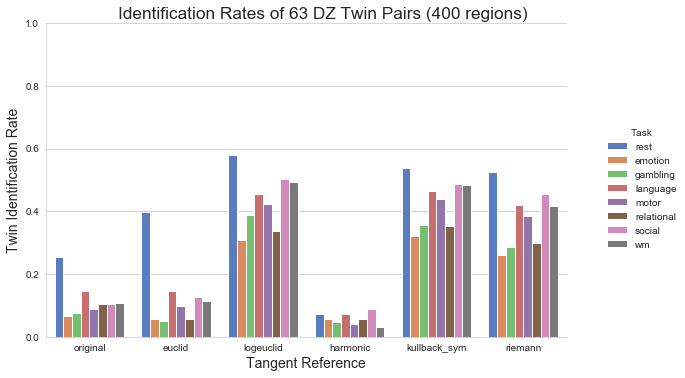

In [12]:
df = pd.read_csv('twins/DZ_twin_updated.csv', names=["First", "Twin Identification Rate"])
df['Parcellation'], df['Task'], df['Tangent Reference'] = df['First'].str.split(':', 2).str
df.drop(['First'], axis=1, inplace=True)
df.round(3)
df = df[['Task', 'Parcellation', 'Tangent Reference', 'Twin Identification Rate']]
ref_plot = sns.catplot(x="Tangent Reference", y="Twin Identification Rate", hue="Task", data=df[df['Parcellation']=='400'],
                height=6, kind="bar", palette="muted", ci=None).set(ylim=(0, 1))
ref_plot.fig.suptitle('Identification Rates of 63 DZ Twin Pairs (400 regions)', y=1.02, fontsize='xx-large')
ref_plot.fig.set_size_inches(10,5)
plt.savefig('twins/DZ_tangent.eps', bbox_inches='tight', transparent=True)
plt.show()

# Subject

/Users/michael/anaconda3/envs/fmri/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


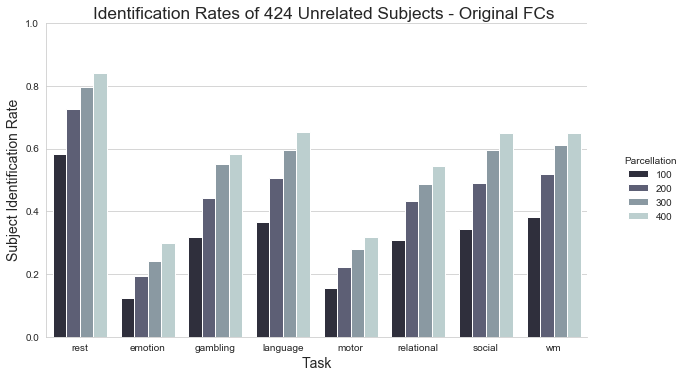

In [14]:
df = pd.read_csv('subject/subject_updated.csv', names=["First", "Subject Identification Rate"])
df['Parcellation'], df['Task'], df['Tangent Reference'] = df['First'].str.split(':', 2).str
df.drop(['First'], axis=1, inplace=True)
df.round(3)
ref_plot = sns.catplot(x="Task", y="Subject Identification Rate", hue="Parcellation", data=df[df['Tangent Reference']=='original'],
                height=6, kind="bar", palette="bone").set(ylim=(0, 1))
ref_plot.fig.suptitle('Identification Rates of 424 Unrelated Subjects - Original FCs', y=1.02, fontsize='xx-large')
ref_plot.fig.set_size_inches(10,5)
plt.savefig('subject/subject_orig.eps', bbox_inches='tight', transparent=True)
plt.show()

/Users/michael/anaconda3/envs/fmri/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


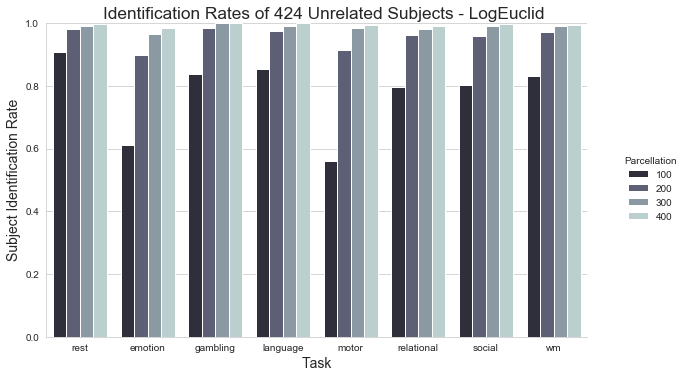

In [15]:
df = pd.read_csv('subject/subject_updated.csv', names=["First", "Subject Identification Rate"])
df['Parcellation'], df['Task'], df['Tangent Reference'] = df['First'].str.split(':', 2).str
df.drop(['First'], axis=1, inplace=True)
df.round(3)
ref_plot = sns.catplot(x="Task", y="Subject Identification Rate", hue="Parcellation", data=df[df['Tangent Reference']=='logeuclid'],
                height=6, kind="bar", palette="bone").set(ylim=(0, 1))
ref_plot.fig.suptitle('Identification Rates of 424 Unrelated Subjects - LogEuclid', y=1.02, fontsize='xx-large')
ref_plot.fig.set_size_inches(10,5)
plt.savefig('subject/subject_logeuclid.eps', bbox_inches='tight', transparent=True)
plt.show()

/Users/michael/anaconda3/envs/fmri/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


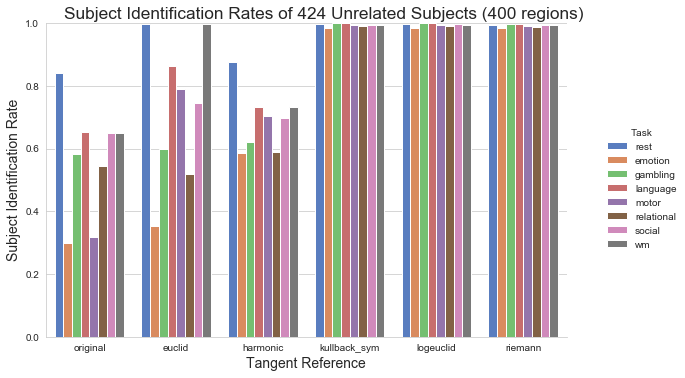

In [16]:
df = pd.read_csv('subject/subject_updated.csv', names=["First", "Subject Identification Rate"])
df['Parcellation'], df['Task'], df['Tangent Reference'] = df['First'].str.split(':', 2).str
df.drop(['First'], axis=1, inplace=True)
df.round(3)
df = df[['Task', 'Parcellation', 'Tangent Reference', 'Subject Identification Rate']]
ref_plot = sns.catplot(x="Tangent Reference", y="Subject Identification Rate", hue="Task", data=df[df['Parcellation']=='400'],
                height=6, kind="bar", palette="muted", ci=None).set(ylim=(0, 1))
ref_plot.fig.suptitle('Subject Identification Rates of 424 Unrelated Subjects (400 regions)', y=1.02, fontsize='xx-large')
ref_plot.fig.set_size_inches(10,5)
plt.savefig('subject/subject_tangent.eps', bbox_inches='tight', transparent=True)
plt.show()